# Description

It takes GLSPhenoplier results on a random phenotype and verifies that the QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_RESULTS_GLS_NULL_SIMS")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/opt/data/results/gls/null_sims"

In [5]:
# PHENOPLIER_GLS_DIR <- file.path(GLS_NULL_SIMS_DIR, "phenoplier", "gls-1000g-mashr-mean_gene_expr")
PHENOPLIER_GLS_DIR <- file.path(GLS_NULL_SIMS_DIR, "phenoplier", "gls-gtex-mashr-mean_gene_expr")

In [6]:
PHENOPLIER_GLS_DIR

[1] "/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr"

# Random pheno 1

Random phenotype 1 has inflation factor of 1

## Load data

In [7]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno1-combined-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
dim(glsph)

[1] 987   3

In [9]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,0.0085369936,0.2444797
2,LV10,0.0230101978,0.0323041
3,LV100,0.0053269246,0.3297664
4,LV101,-0.0128392741,0.8519710
5,LV102,-0.0005621471,0.5176874
6,LV103,-0.0101831174,0.7888506


In [10]:
glsph %>%
  filter(pvalue <= 0.05) %>%
  dim_desc()

[1] "[64 x 3]"

## QQ-plot

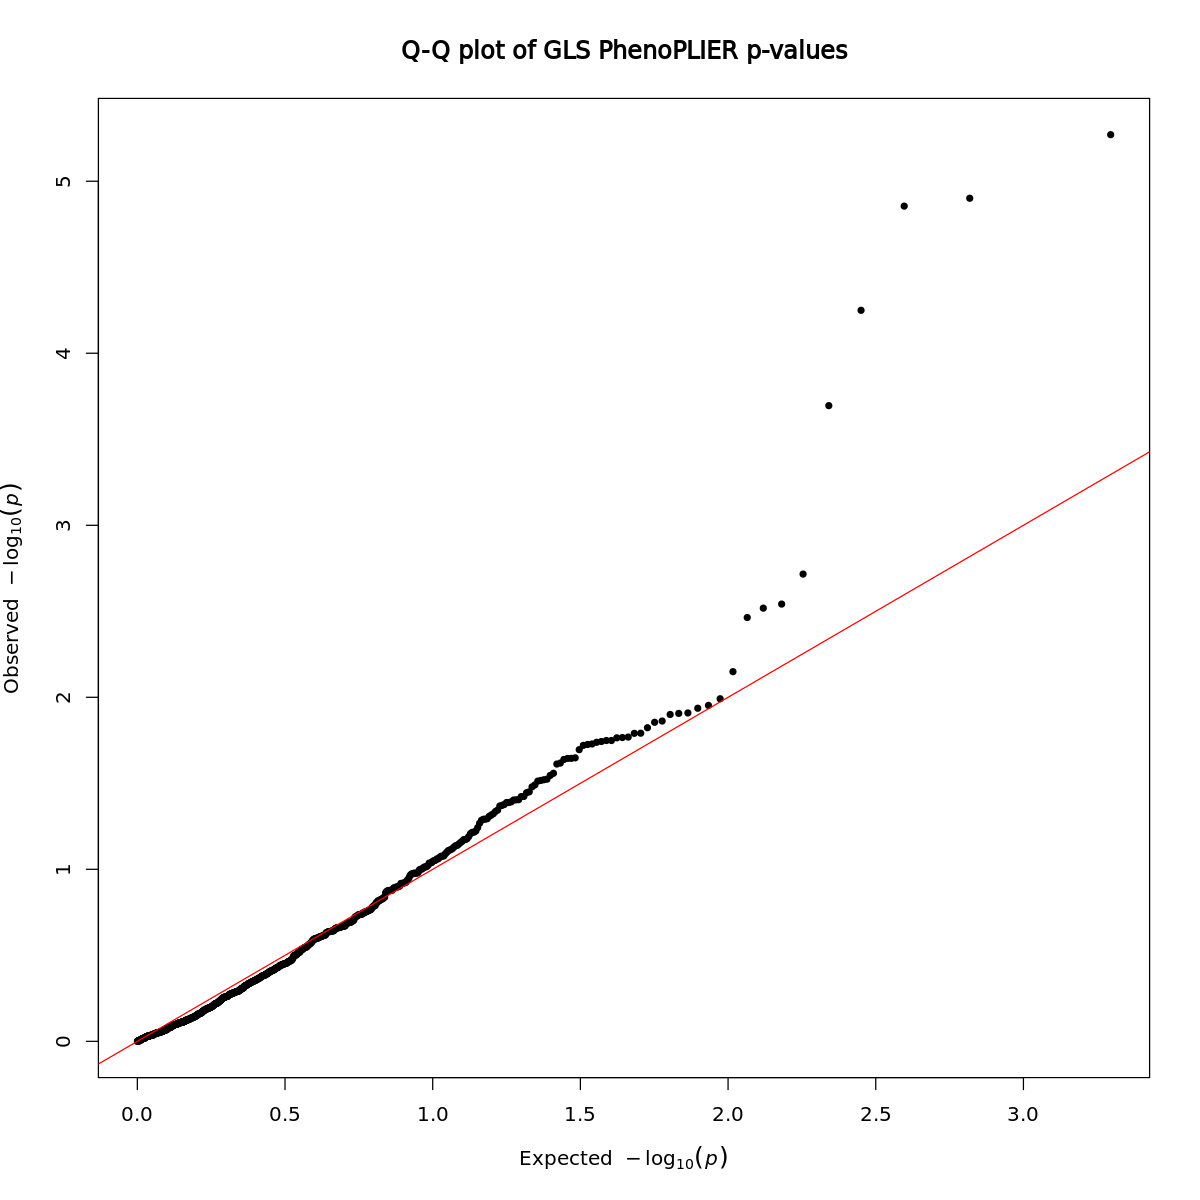

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")

# Random pheno 28

Random phenotype 28 has the largest inflation factor in the original GWAS summary stats (although within the acceptable limits).

## Load data

In [18]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno28-combined-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
dim(glsph)

[1] 987   3

In [20]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,-0.003574241,0.61372607
2,LV10,0.004402302,0.36215719
3,LV100,-0.020042767,0.95093589
4,LV101,0.026487302,0.01573645
5,LV102,-0.001898163,0.55938585
6,LV103,-0.008225319,0.74107964


In [21]:
glsph %>%
  filter(pvalue <= 0.05) %>%
  dim_desc()

[1] "[70 x 3]"

## QQ-plot

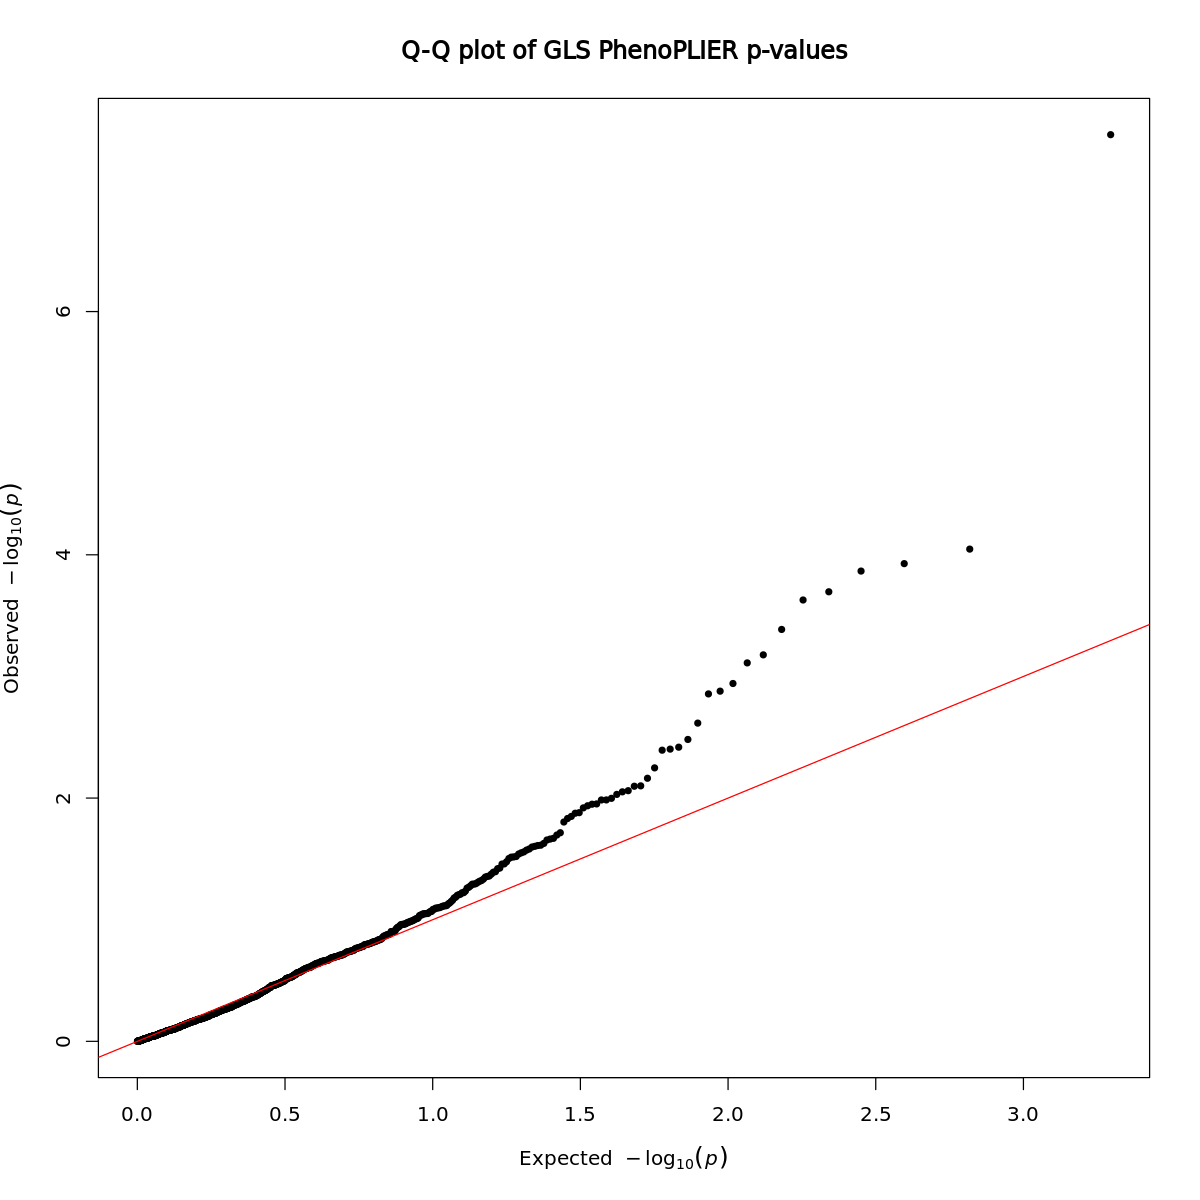

In [22]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")